<a href="https://colab.research.google.com/github/yuukimotai/AI_Master_Course/blob/main/simple_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

シンプルなディープラーニング



In [3]:
import numpy as np
from sklearn import datasets

iris = datasets.load_iris()
print(iris.data[:10])
print(iris.target[:10])
print(iris.data.shape)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
[0 0 0 0 0 0 0 0 0 0]
(150, 4)


In [4]:
from sklearn import preprocessing
from keras import utils# これだけでOK

scaler = preprocessing.StandardScaler()
scaler.fit(iris.data)
x = scaler.transform(iris.data)

print(x[:10])

t = utils.to_categorical(iris.target)
print(t[:10])

[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]
 [-0.53717756  1.93979142 -1.16971425 -1.05217993]
 [-1.50652052  0.78880759 -1.34022653 -1.18381211]
 [-1.02184904  0.78880759 -1.2833891  -1.3154443 ]
 [-1.74885626 -0.36217625 -1.34022653 -1.3154443 ]
 [-1.14301691  0.09821729 -1.2833891  -1.44707648]]
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [5]:
from sklearn.model_selection import train_test_split

x_train, x_test, t_train, t_test = train_test_split(x, t, train_size=0.75)

print(x_train)
print(x_train.shape)
print(x_test.shape)

[[-7.79513300e-01  2.40018495e+00 -1.28338910e+00 -1.44707648e+00]
 [-5.25060772e-02 -5.92373012e-01  7.62758269e-01  1.58046376e+00]
 [ 7.95669016e-01 -1.31979479e-01  8.19595696e-01  1.05393502e+00]
 [ 1.28034050e+00  9.82172869e-02  6.49083415e-01  3.95774101e-01]
 [ 1.28034050e+00  3.28414053e-01  1.10378283e+00  1.44883158e+00]
 [-1.02184904e+00  1.24920112e+00 -1.34022653e+00 -1.31544430e+00]
 [ 5.53333275e-01  7.88807586e-01  1.04694540e+00  1.58046376e+00]
 [-9.00681170e-01  5.58610819e-01 -1.16971425e+00 -9.20547742e-01]
 [ 1.03800476e+00 -1.31979479e-01  8.19595696e-01  1.44883158e+00]
 [-1.14301691e+00  9.82172869e-02 -1.28338910e+00 -1.44707648e+00]
 [-1.26418478e+00  7.88807586e-01 -1.05603939e+00 -1.31544430e+00]
 [-1.02184904e+00  5.58610819e-01 -1.34022653e+00 -1.31544430e+00]
 [ 1.03800476e+00  9.82172869e-02  1.04694540e+00  1.58046376e+00]
 [-5.37177559e-01  7.88807586e-01 -1.16971425e+00 -1.31544430e+00]
 [-4.16009689e-01 -1.51316008e+00 -3.29657076e-02 -2.62386821e

In [6]:
# モデルの構築
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential()
model.add(Dense(32, input_dim=4))
model.add(Activation("relu"))

#中間層
model.add(Dense(32))
model.add(Activation("relu"))

#最終層
model.add(Dense(3))
model.add(Activation("softmax"))

#コンパイル
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                160       
                                                                 
 activation_3 (Activation)   (None, 32)                0         
                                                                 
 dense_4 (Dense)             (None, 32)                1056      
                                                                 
 activation_4 (Activation)   (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 3)                 99        
                                                                 
 activation_5 (Activation)   (None, 3)                 0         
                                                                 
Total params: 1315 (5.14 KB)
Trainable params: 1315 (5

In [13]:
# 学習
history = model.fit(x_train, t_train, epochs=30, batch_size=8)
print(history.history.keys())


Epoch 1/30
14/14 [==============================] - 0s 2ms/step - loss: 0.1834 - accuracy: 0.9464
Epoch 2/30
14/14 [==============================] - 0s 2ms/step - loss: 0.1803 - accuracy: 0.9554
Epoch 3/30
14/14 [==============================] - 0s 3ms/step - loss: 0.1778 - accuracy: 0.9464
Epoch 4/30
14/14 [==============================] - 0s 3ms/step - loss: 0.1753 - accuracy: 0.9464
Epoch 5/30
14/14 [==============================] - 0s 3ms/step - loss: 0.1737 - accuracy: 0.9554
Epoch 6/30
14/14 [==============================] - 0s 3ms/step - loss: 0.1704 - accuracy: 0.9643
Epoch 7/30
14/14 [==============================] - 0s 2ms/step - loss: 0.1678 - accuracy: 0.9554
Epoch 8/30
14/14 [==============================] - 0s 3ms/step - loss: 0.1664 - accuracy: 0.9643
Epoch 9/30
14/14 [==============================] - 0s 3ms/step - loss: 0.1638 - accuracy: 0.9554
Epoch 10/30
14/14 [==============================] - 0s 2ms/step - loss: 0.1616 - accuracy: 0.9643
Epoch 11/30
14/14 [

dict_keys(['loss', 'accuracy'])


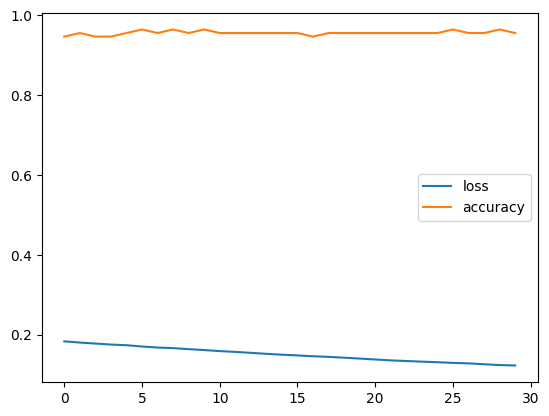

In [14]:
#学習の推移
import matplotlib.pyplot as plt
print(history.history.keys())

hist_loss = history.history["loss"]
hist_acc = history.history["accuracy"]

plt.plot(np.arange(len(hist_loss)), hist_loss, label="loss")
plt.plot(np.arange(len(hist_acc)), hist_acc, label="accuracy")
plt.legend()
plt.show()

In [16]:
# 評価
loss, accuracy = model.evaluate(x_test, t_test)
print(loss, accuracy)

2/2 [==============================] - 0s 14ms/step - loss: 0.1275 - accuracy: 0.9737
0.12753300368785858 0.9736841917037964


In [17]:
# 予測
model.predict(x_test)

2/2 [==============================] - 0s 15ms/step


array([[1.17778527e-02, 8.77061844e-01, 1.11160144e-01],
       [5.24139171e-03, 2.45954722e-01, 7.48803973e-01],
       [4.59883735e-03, 8.55693340e-01, 1.39707804e-01],
       [5.91542199e-03, 3.47458541e-01, 6.46625996e-01],
       [4.98762690e-02, 6.62650824e-01, 2.87472904e-01],
       [8.08209472e-04, 2.16050837e-02, 9.77586687e-01],
       [9.97729480e-01, 1.29835214e-03, 9.72202513e-04],
       [4.19338001e-03, 1.12354159e-01, 8.83452415e-01],
       [1.14214905e-02, 9.23906386e-01, 6.46721497e-02],
       [9.92426813e-01, 5.13183558e-03, 2.44134851e-03],
       [9.96482074e-01, 2.32082536e-03, 1.19709573e-03],
       [9.97958779e-01, 1.28238054e-03, 7.58725975e-04],
       [1.25953732e-02, 8.99716556e-01, 8.76881182e-02],
       [9.99066949e-01, 5.15275868e-04, 4.17785603e-04],
       [1.35331822e-03, 1.84154119e-02, 9.80231166e-01],
       [2.55515557e-02, 5.81276238e-01, 3.93172175e-01],
       [9.98865962e-01, 6.23529253e-04, 5.10554819e-04],
       [5.22668590e-04, 1.14745

In [18]:
# モデルの保存
from keras.models import load_model

model.save("model.h5")
load_model("model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
